# Example 3. Kernel Principal Component Analysis
---

We have learned the linear case of feature decomposition and reduction with **PCA** [(Example 1.)](example_01_PCA.ipynb) and **Fisher's LDA** [(Example 2.)](example_02_FisherLDA.ipynb) to make distinguishing the classes easier. But they only work well when the classes' feature distributions can be linearly separate in the projected space. However, in the real case, the most of dataset performs much complex or non-linear distributions within the classes. We usually expand and transfer this kind of distributions to higher dimension space, and then do the redution algorithm, but it can cost more computing resourse depending on the number of dimensions. The **kernel method**, thus, is introduced to avoid this problem. The method can expend the original feature dimensions, $D$, to the higher dimensions (even infinite), $D^{'}$, but the computing resourse only *dependents on number of data*, $N$, *instead of the feature dimensions*. The kernel method uses a **kernel function** which is defined as

$$
\begin{equation}
k(\mathbf{x},\mathbf{x^{'}})=\phi(\mathbf{x})\phi(\mathbf{x^{'}})^T\ ,
\end{equation}
$$

where $\phi(\mathbf{.})$ is a transfer function for a datapoint $x$. The **kernel function** represents a concept of similarity between $\phi(\mathbf{x})$ and $\phi(\mathbf{x^{'}})$ and gives a scalar factor. The feature to form a kernel function is using **dual representation** which replaces the $\mathbf{w}$, correspoding to the features $D$, to a parameter $\mathbf{a}_i$ with $N$-dimension, where $i$ indicates a certain dimension of the projected hyperspace. Then we can apply these conditions to standard **PCA** procedure and have the distinct classes projected on pricipal components. 

---
## Daul representation

---
## Kernel PCA method



### Import packages and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plot_decision_regions import *
from sklearn.datasets import make_moons, make_circles

In [2]:
# Moon sample
X_m, y_m = make_moons(n_samples=100, random_state=123)
# Circle sample
X_c, y_c = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

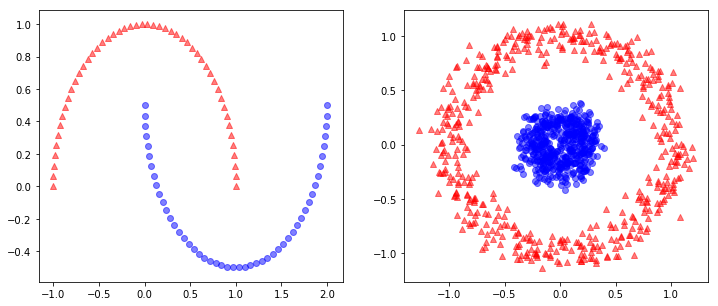

In [3]:
fig = plt.figure(figsize=(12,5))
fig.add_subplot(1,2,1)
plt.scatter(X_m[y_m==0, 0], X_m[y_m==0, 1], color='red',  marker='^', alpha=0.5)
plt.scatter(X_m[y_m==1, 0], X_m[y_m==1, 1], color='blue', marker='o', alpha=0.5)
fig.add_subplot(1,2,2)
plt.scatter(X_c[y_c==0, 0], X_c[y_c==0, 1], color='red',  marker='^', alpha=0.5)
plt.scatter(X_c[y_c==1, 0], X_c[y_c==1, 1], color='blue', marker='o', alpha=0.5)
plt.show()

In [4]:
# Plotting function
def show(X, y):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
    # 2D
    ax[0].scatter(X[y==0, 0], X[y==0, 1], color='red',  marker='^', alpha=0.5)
    ax[0].scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='o', alpha=0.5)
    # 1D
    ax[1].scatter(X[y==0, 0], np.zeros((len(X[y==0]),1))+0.02, color='red',  marker='^', alpha=0.5)
    ax[1].scatter(X[y==1, 0], np.zeros((len(X[y==1]),1))-0.02, color='blue', marker='^', alpha=0.5)
    # plotting
    ax[0].set_xlabel('PC1')
    ax[0].set_ylabel('PC2')
    ax[1].set_xlabel('PC1')
    ax[1].set_ylim([-1, 1])
    ax[1].set_yticks([])
    plt.show()

### 1. Linear PCA by scikit-learn

In [5]:
from sklearn.decomposition import PCA

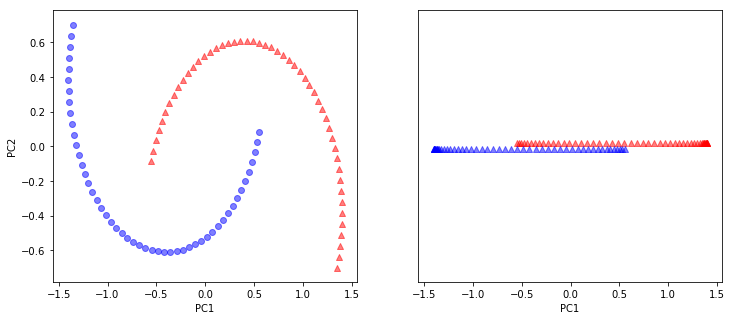

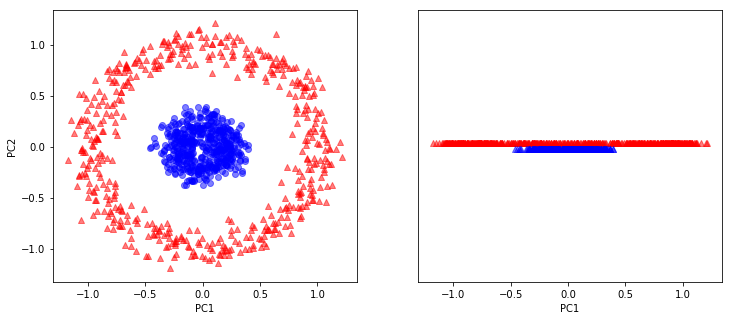

In [6]:
scikit_pca = PCA(n_components=2)
X_mspca = scikit_pca.fit_transform(X_m)
X_cspca = scikit_pca.fit_transform(X_c)
show(X_mspca, y_m)
show(X_cspca, y_c)

### 2. RBF-PCA by Scipy, Numpy
#### 2.1. 2-D projection

In [7]:
from rbf_kernel_pca import *

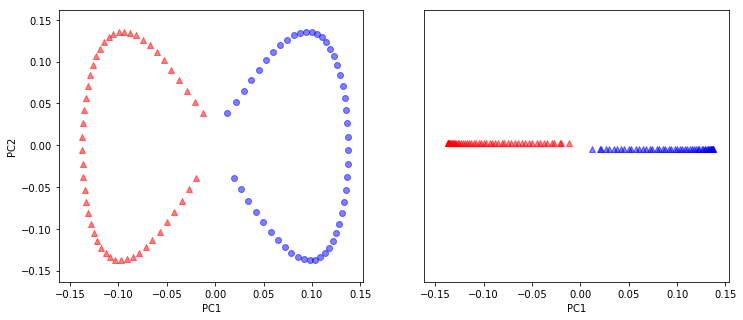

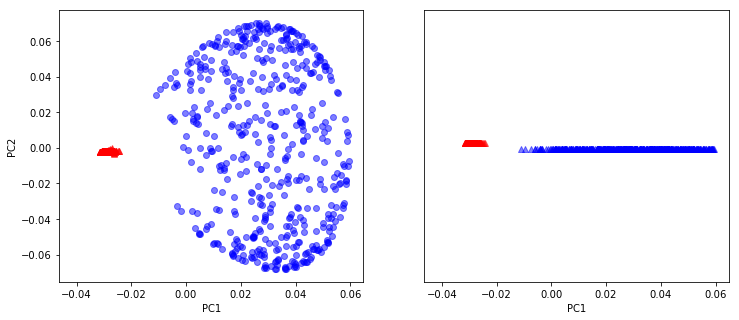

In [8]:
X_mkpca = rbf_kernel_pca(X_m, gamma=15, n_components=2) # return transfered_X, eigenvalue 
X_ckpca = rbf_kernel_pca(X_c, gamma=15, n_components=2)
show(X_mkpca[0], y_m)
show(X_ckpca[0], y_c)

In [9]:
X_mkpca[1]

[7.062724756679958, 6.7711095439536013]

#### 2.2. 1-D projection

In [10]:
def project_x(x_new, X, gamma, eigenvectors, eiganvalues):
    pair_dist = np.array([np.sum(x_new-row)**2 for row in X])
    k = np.exp(-gamma * pair_dist)
    return k.dot(eigenvectors/eiganvalues)

In [11]:
eigenvectors, eiganvalues = rbf_kernel_pca(X_m, gamma=15, n_components=1)
x_new = X_m[25]
x_new

array([ 1.8713187 ,  0.00928245])

In [12]:
x_proj = eigenvectors[25]
x_proj

array([ 0.07877284])

In [13]:
x_reproj = project_x(x_new, X_m, gamma=15, eigenvectors=eigenvectors, eiganvalues=eiganvalues)
x_reproj

array([ 0.05347365])

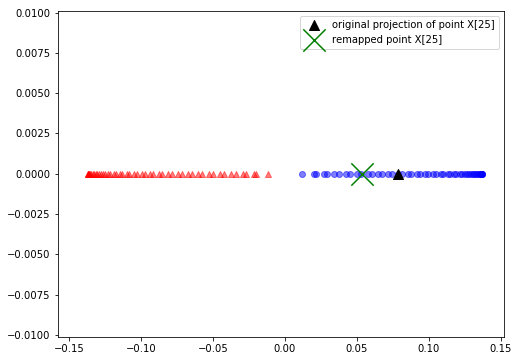

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(eigenvectors[y_m==0, 0], np.zeros((50)), color='red',  marker='^', alpha=0.5)
plt.scatter(eigenvectors[y_m==1, 0], np.zeros((50)), color='blue', marker='o', alpha=0.5)
plt.scatter(x_proj,   0, color='black', label='original projection of point X[25]', marker='^', s=100)
plt.scatter(x_reproj, 0, color='green', label='remapped point X[25]', marker='x', s=500)
plt.legend(scatterpoints=1)
plt.show()

### 3. RBF-PCA by scikit-learn

In [15]:
from sklearn.decomposition import KernelPCA

In [16]:
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X_m)

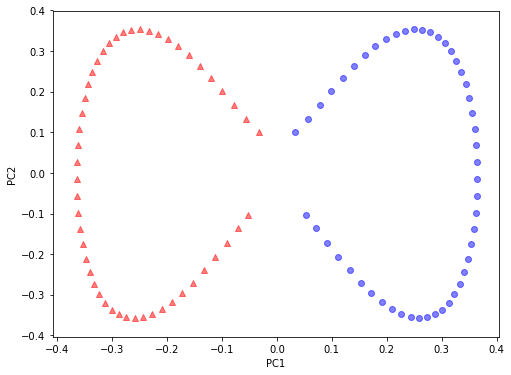

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(X_skernpca[y_m==0, 0], X_skernpca[y_m==0, 1], color='red',  marker='^', alpha=0.5)
plt.scatter(X_skernpca[y_m==1, 0], X_skernpca[y_m==1, 1], color='blue', marker='o', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()